In [2]:
#imports
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import os


#Feel free to delete these if you don't want to install them all right away
import xgboost as xgb
from catboost import CatBoostClassifier
#Used sm and smf instead to get these, but can still use them if needed, but sm has better summary() function
from sklearn.linear_model import LinearRegression, LogisticRegression, TweedieRegressor
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import poisson, binom, norm
from scipy.stats import chisquare
import statsmodels.api as sm
import statsmodels.formula.api as smf



from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, make_scorer, roc_auc_score, log_loss, precision_score, recall_score, roc_curve, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from collections import Counter
import scipy.stats as st



#Change this to whereever you save your stuff
os.chdir("C:\ASNA_Case_Comp")


<>:36: SyntaxWarning: invalid escape sequence '\A'
<>:36: SyntaxWarning: invalid escape sequence '\A'
C:\Users\graha\AppData\Local\Temp\ipykernel_33008\1835299192.py:36: SyntaxWarning: invalid escape sequence '\A'
  os.chdir("C:\ASNA_Case_Comp")


In [3]:
#Read in dataset
dat = pd.read_excel("Dataset.xlsx")
dat_one_hot = pd.read_csv("cleanData.csv",header=0)

#Add a column for has claim
dat['has_claim'] = dat['claim_id'].apply(lambda x: 1 if x !=0 else 0)
dat_one_hot['has_claim'] = dat_one_hot['claim_id'].apply(lambda x: 1 if x !=0 else 0)

count = 0
for row in dat_one_hot['has_claim']:
    if row > 0:
        count+=1
print(count)
#There is this many total claims out of 10000 students

1819


# Reading in Aidan's data segmented by coverage type

In [4]:
dat_expense = pd.read_csv("CleanByCoverage\CleanByCoverage\expenseClean.csv",header=0)
dat_expense['has_claim'] = dat_expense['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_liability = pd.read_csv("CleanByCoverage\CleanByCoverage\liabilityClean.csv",header=0)
dat_liability['has_claim'] = dat_liability['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_medical = pd.read_csv("CleanByCoverage\CleanByCoverage\medicalClean.csv",header=0)
dat_medical['has_claim'] = dat_medical['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_property = pd.read_csv("CleanByCoverage\CleanByCoverage\propertyClean.csv",header=0)
dat_property['has_claim'] = dat_property['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_expense_original = pd.read_csv("OriginalByCoverage\OriginalByCoverage\expense.csv",header=0)
dat_expense_original['has_claim'] = dat_expense_original['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_liability_original = pd.read_csv("OriginalByCoverage\OriginalByCoverage\liability.csv",header=0)
dat_liability_original['has_claim'] = dat_liability_original['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_medical_original = pd.read_csv("OriginalByCoverage\OriginalByCoverage\medical.csv",header=0)
dat_medical_original['has_claim'] = dat_medical_original['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_property_original = pd.read_csv("OriginalByCoverage\OriginalByCoverage\property.csv",header=0)
dat_property_original['has_claim'] = dat_property_original['claim_id'].apply(lambda x: 1 if x !=0 else 0)


<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:10: SyntaxWarning: invalid escape sequence '\C'
<>:13: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\O'
<>:19: SyntaxWarning: invalid escape sequence '\O'
<>:22: SyntaxWarning: invalid escape sequence '\O'
<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:10: SyntaxWarning: invalid escape sequence '\C'
<>:13: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\O'
<>:19: SyntaxWarning: invalid escape sequence '\O'
<>:22: SyntaxWarning: invalid escape sequence '\O'
C:\Users\graha\AppData\Local\Temp\ipykernel_33008\766309216.py:1: SyntaxWarning: invalid escape sequence '\C'
  dat_expense = pd.read_csv("CleanByCoverage\CleanByCoverage\expenseClean.csv",h

# Calculating Claim Frequency

In [5]:
print('Frequency for Additional Expense Coverage')
claim_frequency_expense = list(zip(dat_expense_original['has_claim'], dat_expense_original['risk_tier']))
claim_frequency_expense_counts = Counter(claim_frequency_expense)
for item, count in claim_frequency_expense_counts.items():
    print(f'{item}: {count}')

print('Frequency for Liability Coverage')
claim_frequency_liability = list(zip(dat_liability_original['has_claim'], dat_liability_original['risk_tier']))
claim_frequency_liability_counts = Counter(claim_frequency_liability)
for item, count in claim_frequency_liability_counts.items():
    print(f'{item}: {count}')

print('Frequency for Medical Coverage')
claim_frequency_medical = list(zip(dat_medical_original['has_claim'], dat_medical_original['risk_tier']))
claim_frequency_medical_counts = Counter(claim_frequency_medical)
for item, count in claim_frequency_medical_counts.items():
    print(f'{item}: {count}')

print('Frequency for Property Coverage')
claim_frequency_property = list(zip(dat_property_original['has_claim'], dat_property_original['risk_tier']))
claim_frequency_property_counts = Counter(claim_frequency_property)
for item, count in claim_frequency_property_counts.items():
    print(f'{item}: {count}')

Frequency for Additional Expense Coverage
(0, 2): 2100
(0, 3): 3124
(0, 1): 4264
(1, 2): 111
(1, 1): 255
(1, 3): 162
Frequency for Liability Coverage
(0, 2): 2190
(0, 3): 3251
(0, 1): 4474
(1, 3): 28
(1, 2): 19
(1, 1): 38
Frequency for Medical Coverage
(0, 2): 2154
(0, 3): 3209
(0, 1): 4408
(1, 3): 72
(1, 2): 55
(1, 1): 106
Frequency for Property Coverage
(0, 2): 1999
(0, 3): 3011
(0, 1): 4068
(1, 1): 470
(1, 3): 281
(1, 2): 222


# Modelling Claim Severity

In [6]:
total_loss_expense = dat_expense['amount'].sum()
print(f"Total Expense Loss: {total_loss_expense:,.2f}")

total_claims_expense = dat_expense['has_claim'].sum()
print(f"Total Expense Claims: {total_claims_expense}")

severity_expense = total_loss_expense / total_claims_expense
print(f"Expense Severity (Loss per Claim): {severity_expense:,.2f}")

total_loss_property = dat_property['amount'].sum()
print(f"Total Property Loss: {total_loss_property:,.2f}")

total_claims_property = dat_property['has_claim'].sum()
print(f"Total Property Claims: {total_claims_property}")

severity_property = total_loss_property / total_claims_property
print(f"Property Severity (Loss per Claim): {severity_property:,.2f}")

total_loss_medical = dat_medical['amount'].sum()
print(f"Total Medical Loss: {total_loss_medical:,.2f}")

total_claims_medical = dat_medical['has_claim'].sum()
print(f"Total Medical Claims: {total_claims_medical}")

severity_medical = total_loss_medical / total_claims_medical
print(f"Medical Severity (Loss per Claim): {severity_medical:,.2f}")

total_loss_liability = dat_liability['amount'].sum()
print(f"Total Liability Loss: {total_loss_liability:,.2f}")

total_claims_liability = dat_liability['has_claim'].sum()
print(f"Total Liability Claims: {total_claims_liability}")

severity_liability = total_loss_liability / total_claims_liability
print(f"Liability Severity (Loss per Claim): {severity_liability:,.2f}")




Total Expense Loss: 2,911,317.09
Total Expense Claims: 528
Expense Severity (Loss per Claim): 5,513.86
Total Property Loss: 995,460.03
Total Property Claims: 973
Property Severity (Loss per Claim): 1,023.08
Total Medical Loss: 3,870,552.10
Total Medical Claims: 233
Medical Severity (Loss per Claim): 16,611.81
Total Liability Loss: 737,410.81
Total Liability Claims: 85
Liability Severity (Loss per Claim): 8,675.42


In [7]:
#Distance grouping function
range_vals = [0,5,30]
def distance_grouper(row,distance_range):
    if row == range_vals[0]:
        return 0
    elif row < range_vals[1]:
        return 1
    else: # Greater than range 2 but within range 3 but in this case is just the max range
        return 2

#Apply this to medical dataset
dat_medical['distance_group'] = dat_medical['distance_to_campus'].apply(lambda x: distance_grouper(x,range_vals))
dat_expense['distance_group'] = dat_expense['distance_to_campus'].apply(lambda x: distance_grouper(x,range_vals))
dat_liability['distance_group'] = dat_liability['distance_to_campus'].apply(lambda x: distance_grouper(x,range_vals))
dat_property['distance_group'] = dat_property['distance_to_campus'].apply(lambda x: distance_grouper(x,range_vals))

In [8]:
#Counts for people in all variables
#10,000 Unique people in the dataset

#Sprinkler
count_sprinkler = dat_one_hot[dat_one_hot['sprinklered']==1]['student_id'].nunique()
count_no_sprinkler = 10000 - count_sprinkler
print('People with Sprinklers')
print(f'People with Sprinkler: {count_sprinkler}')
print(f'People without Sprinkler: {count_no_sprinkler}\n')

#Greek
count_greek = dat_one_hot[dat_one_hot['greek']==1]['student_id'].nunique()
count_no_greek = 10000 - count_greek
print('People living in Greek (Group Housing)')
print(f'People Living in Greek: {count_greek}')
print(f'People not Living in Greek: {count_no_greek}\n')

#Male Female Other
count_male = dat_one_hot[dat_one_hot['GMale']==1]['student_id'].nunique()
count_female = dat_one_hot[dat_one_hot['GFemale']==1]['student_id'].nunique()
count_other = dat_one_hot[dat_one_hot['GOther']==1]['student_id'].nunique()
count_prefer_not_to_say = 10000 - count_male - count_female - count_other

#Gender
print(f'Types of responses for Gender: {dat['gender'].unique()}')
print(f'Number of Males: {count_male}')
print(f'Number of Females: {count_female}')
print(f'Number of Other: {count_other}')
print(f'Number Prefer Not to Say: {count_prefer_not_to_say}\n')

#Degree
print(f'Types of responses for Study: {dat['study'].unique()}')
count_science = dat_one_hot[dat_one_hot['SScience']==1]['student_id'].nunique()
count_business = dat_one_hot[dat_one_hot['SBusiness']==1]['student_id'].nunique()
count_humanities = dat_one_hot[dat_one_hot['SHumanities']==1]['student_id'].nunique()
count_unspecified = 10000 - count_business - count_science - count_humanities

print(f'Number studying Science: {count_science}')
print(f'Number studying Business: {count_business}')
print(f'Number studying Humanities: {count_humanities}')
print(f'Number Unspecified: {count_unspecified}\n')

#Campus
count_off_campus = dat_one_hot[dat_one_hot['off_campus']==1]['student_id'].nunique()
count_on_campus = 10000 - count_off_campus


print('Number of people on-campus vs. off-campus')
print(f'Number of students on-campus: {count_on_campus}')
print(f'Number of students off-campus: {count_off_campus}\n')

#HELP's Risk Tier
count_risk_2 = dat_one_hot[dat_one_hot['R2']==1]['student_id'].nunique()
count_risk_3 = dat_one_hot[dat_one_hot['R3']==1]['student_id'].nunique()
count_risk_1 = 10000 - count_risk_2 - count_risk_3

print("HELP's Current Risk Assessment")
print(f'Risk Group 1: {count_risk_1}')
print(f'Risk Group 2: {count_risk_2}')
print(f'Risk Group 3: {count_risk_3}\n')

#Claims by Type of Insurance
count_medical = dat_medical[dat_medical['has_claim']==1]['student_id'].nunique()
count_property = dat_property[dat_property['has_claim']==1]['student_id'].nunique()
count_expense = dat_expense[dat_expense['has_claim']==1]['student_id'].nunique()
count_liability = dat_liability[dat_liability['has_claim']==1]['student_id'].nunique()

print('Claims by Type of Insurance')
print(f'Medical Claims: {count_medical}')
print(f'Property Claims: {count_property}')
print(f'Additional Living Expense Claims: {count_expense}')
print(f'Liability Claims: {count_liability}\n')

#Total Claim losses by type
losses_medical = dat_medical['amount'].sum()
losses_property = dat_property['amount'].sum()
losses_expense = dat_expense['amount'].sum()
losses_liability = dat_liability['amount'].sum()

print('Losses by Coverage Type')
print(f'Losses Medical: {losses_medical:.2f}')
print(f'Losses Property: {losses_property:.2f}')
print(f'Losses Additional Living Expense: {losses_expense:.2f}')
print(f'Losses Liability: {losses_liability:.2f}\n')

#Split by year of study
count_freshman = dat_one_hot[dat_one_hot['CFreshman']==1]['student_id'].nunique()
count_sophomore = dat_one_hot[dat_one_hot['CSophomore']==1]['student_id'].nunique()
count_junior = dat_one_hot[dat_one_hot['CJunior']==1]['student_id'].nunique()
count_senior = dat_one_hot[dat_one_hot['CSenior']==1]['student_id'].nunique()
count_grad = 10000 - count_freshman - count_sophomore - count_junior - count_senior


print(f'Levels of years of Study: {dat['class'].unique()}')
print(f'Number of Freshman Students: {count_freshman}')
print(f'Number of Sophomore Students: {count_sophomore}')
print(f'Number of Junior Students: {count_junior}')
print(f'Number of Senior Students: {count_senior}')
print(f'Number of Grad Students: {count_grad}\n')




People with Sprinklers
People with Sprinkler: 7042
People without Sprinkler: 2958

People living in Greek (Group Housing)
People Living in Greek: 1965
People not Living in Greek: 8035

Types of responses for Gender: ['Male' 'Female' 'Other' 'Did not respond']
Number of Males: 4525
Number of Females: 4493
Number of Other: 679
Number Prefer Not to Say: 303

Types of responses for Study: ['Humanities' 'Science' 'Business' 'Other']
Number studying Science: 2473
Number studying Business: 2585
Number studying Humanities: 2459
Number Unspecified: 2483

Number of people on-campus vs. off-campus
Number of students on-campus: 6505
Number of students off-campus: 3495

HELP's Current Risk Assessment
Risk Group 1: 4512
Risk Group 2: 2209
Risk Group 3: 3279

Claims by Type of Insurance
Medical Claims: 229
Property Claims: 922
Additional Living Expense Claims: 512
Liability Claims: 85

Losses by Coverage Type
Losses Medical: 3870552.10
Losses Property: 995460.03
Losses Additional Living Expense: 2911

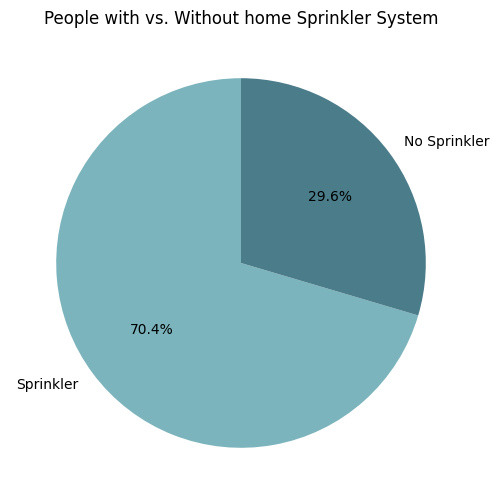

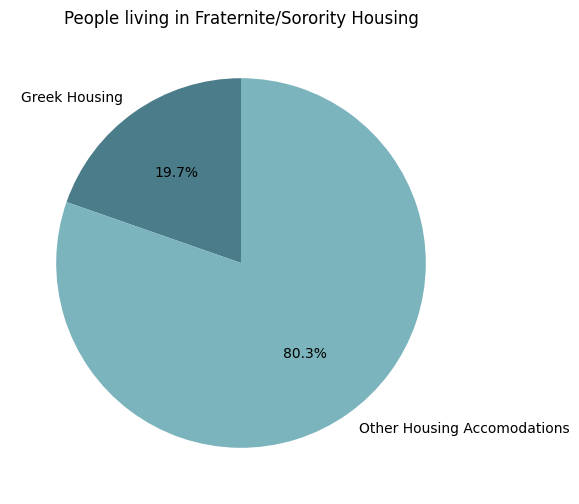

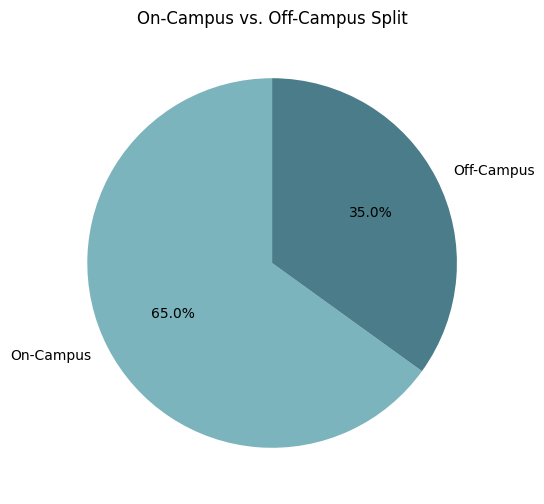

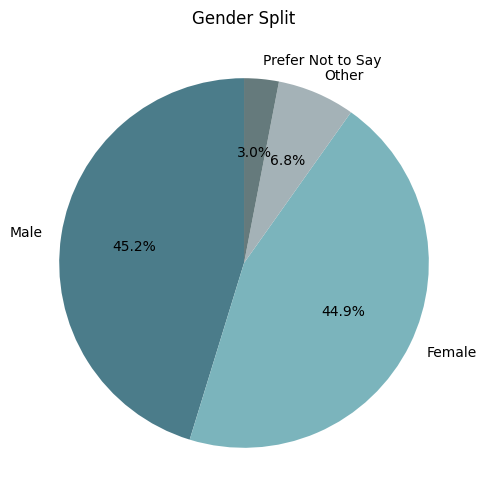

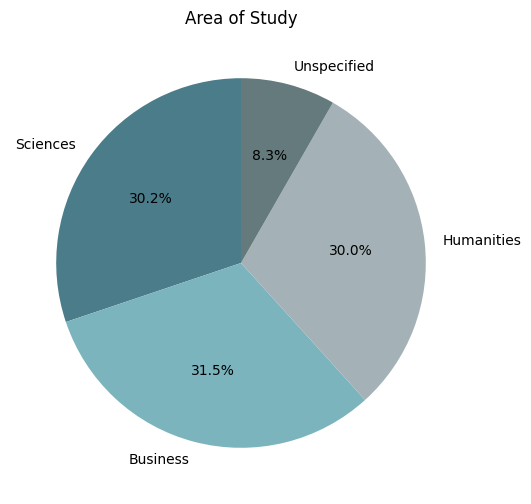

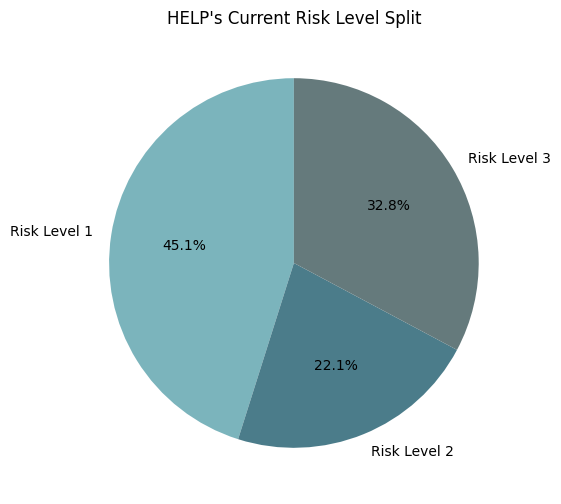

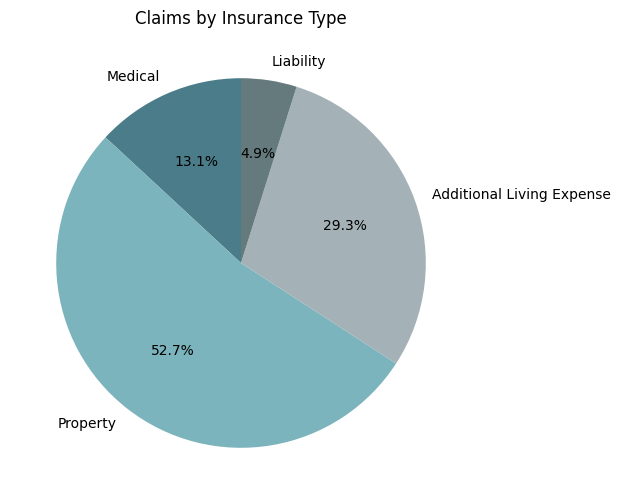

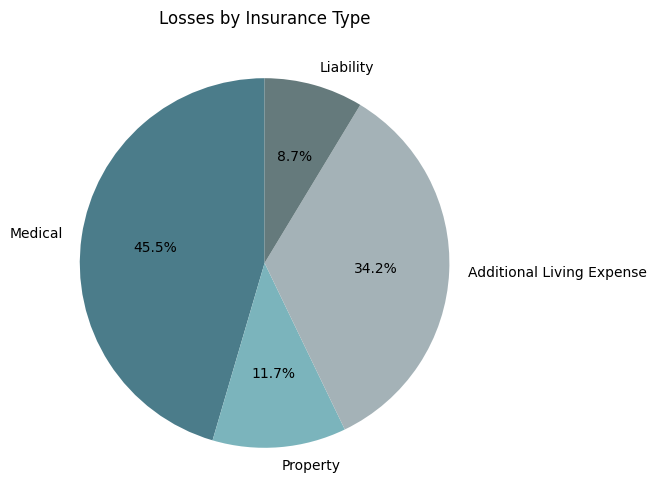

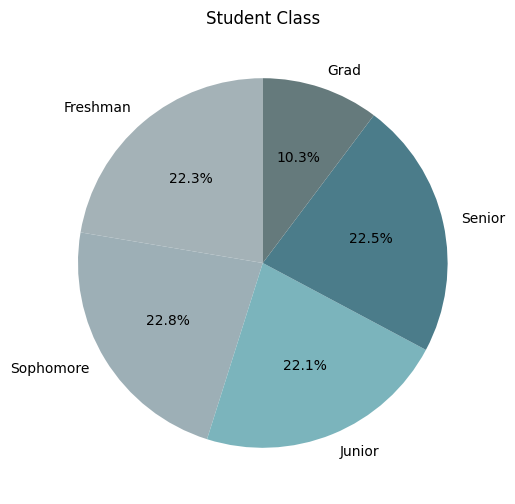

In [9]:
#Charts of these values
g_c = ["#A4B2B7", "#9DAFB6", "#7BB4BC", "#4B7C8A", "#657A7C"]


plt.figure(figsize=(6, 6))
plt.pie([count_sprinkler,count_no_sprinkler], labels=['Sprinkler','No Sprinkler'], autopct='%1.1f%%', startangle=90,colors=[g_c[2],g_c[3]])
plt.title("People with vs. Without home Sprinkler System")
plt.show()

plt.figure(figsize=(6, 6))
plt.pie([count_greek,count_no_greek], labels=['Greek Housing','Other Housing Accomodations'], autopct='%1.1f%%', startangle=90,colors=[g_c[3],g_c[2]])
plt.title("People living in Fraternite/Sorority Housing")
plt.show()

plt.figure(figsize=(6, 6))
plt.pie([count_on_campus,count_off_campus], labels=['On-Campus','Off-Campus'], autopct='%1.1f%%', startangle=90,colors=[g_c[2],g_c[3]])
plt.title("On-Campus vs. Off-Campus Split")
plt.show()

plt.figure(figsize=(6, 6))
plt.pie([count_male,count_female,count_other,count_prefer_not_to_say], labels=['Male','Female','Other','Prefer Not to Say'], autopct='%1.1f%%', startangle=90,colors=[g_c[3],g_c[2],g_c[0],g_c[4]])
plt.title("Gender Split")
plt.show()

plt.figure(figsize=(6, 6))
plt.pie([count_science,count_business,count_humanities,count_other], labels=['Sciences','Business','Humanities','Unspecified'], autopct='%1.1f%%', startangle=90,colors=[g_c[3],g_c[2],g_c[0],g_c[4]])
plt.title("Area of Study")
plt.show()

plt.figure(figsize=(6, 6))
plt.pie([count_risk_1,count_risk_2,count_risk_3,], labels=['Risk Level 1','Risk Level 2','Risk Level 3'], autopct='%1.1f%%', startangle=90,colors=[g_c[2],g_c[3],g_c[4]])
plt.title("HELP's Current Risk Level Split")
plt.show()

plt.figure(figsize=(6, 6))
plt.pie([count_medical,count_property,count_expense,count_liability], labels=['Medical','Property','Additional Living Expense','Liability'], autopct='%1.1f%%', startangle=90,colors=[g_c[3],g_c[2],g_c[0],g_c[4]])
plt.title("Claims by Insurance Type")
plt.show()

plt.figure(figsize=(6, 6))
plt.pie([losses_medical,losses_property,losses_expense,losses_liability], labels=['Medical','Property','Additional Living Expense','Liability'], autopct='%1.1f%%', startangle=90,colors=[g_c[3],g_c[2],g_c[0],g_c[4]])
plt.title("Losses by Insurance Type")
plt.show()

plt.figure(figsize=(6, 6))
plt.pie([count_freshman,count_sophomore,count_junior,count_senior,count_grad], labels=['Freshman','Sophomore','Junior','Senior','Grad'], autopct='%1.1f%%', startangle=90,colors=g_c)
plt.title("Student Class")
plt.show()

In [10]:
#Claim ratio sprinkler to no sprinkler
property_ratio_dat = dat_property[dat_property['amount']>0]

dat_property_ratio_2000 = property_ratio_dat[property_ratio_dat['amount']<2000]
dat_property_ratio_greater_2000 = property_ratio_dat[property_ratio_dat['amount']>=2000]

#First Ratio under 2000
ratio1_property_num = dat_property_ratio_2000[dat_property_ratio_2000['sprinklered']==1]['student_id'].nunique()
ratio1_property_denom = dat_property_ratio_2000[dat_property_ratio_2000['sprinklered']==0]['student_id'].nunique()

ratio1 = ratio1_property_num / ratio1_property_denom
print(f'{ratio1:.2f}:1 Sprinkler to no Sprinkler claim ratio for claims under $2000')

ratio2_property_num = dat_property_ratio_greater_2000[dat_property_ratio_greater_2000['sprinklered']==1]['student_id'].nunique()
ratio2_property_denom = dat_property_ratio_greater_2000[dat_property_ratio_greater_2000['sprinklered']==0]['student_id'].nunique()

ratio2 = ratio2_property_num / ratio2_property_denom
print(f'{ratio2:.2f}:1 Sprinkler to no Sprinkler claim ratio for claims over $2000')

2.80:1 Sprinkler to no Sprinkler claim ratio for claims under $2000
1.06:1 Sprinkler to no Sprinkler claim ratio for claims over $2000


2.3309177896137605


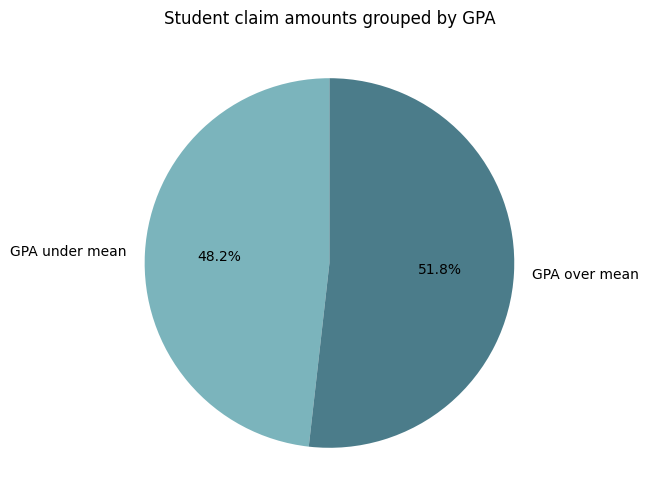

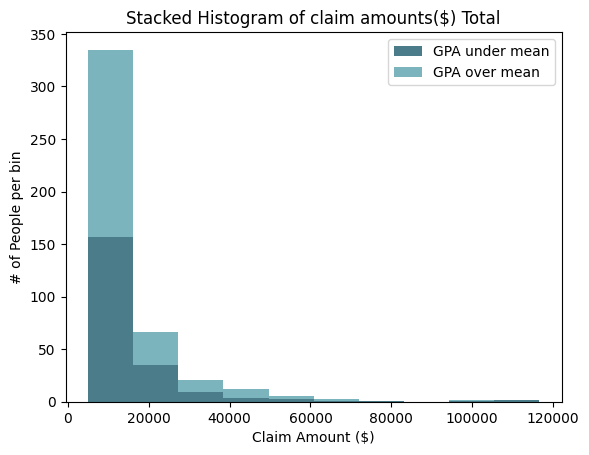

In [ ]:
#GPA Analysis

mean_gpa = dat_one_hot['gpa'].mean()
print(mean_gpa)

gpa_under_mean = dat_one_hot[dat_one_hot['gpa']<mean_gpa]
gpa_over_mean = dat_one_hot[dat_one_hot['gpa']>=mean_gpa]


plt.figure(figsize=(6, 6))
plt.pie([gpa_under_mean['has_claim'].sum(),gpa_over_mean['has_claim'].sum()], labels=['GPA under mean','GPA over mean'], autopct='%1.1f%%', startangle=90,colors=[g_c[2],g_c[3]])
plt.title("Student claim amounts grouped by GPA")
plt.show()

gpa_under_mean0 = gpa_under_mean[gpa_under_mean['amount']>20000]
gpa_over_mean0 = gpa_over_mean[gpa_over_mean['amount']>20000]


plt.hist(
        [gpa_under_mean0['amount'], gpa_over_mean0['amount']],
        bins=10,
        stacked=True,
        color=[g_c[3], g_c[2]],
        label=["GPA under mean", "GPA over mean"]
    )

plt.xlabel("Claim Amount ($)")
plt.ylabel("# of People per bin")
plt.title(f"Stacked Histogram of claim amounts($) Total")
plt.legend()
plt.show()
